In [2]:
import cv2, random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('../data/bw.png', cv2.IMREAD_GRAYSCALE)

* 이미지의 윤곽선을 찾아 표시

In [4]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# -1 : 모든 외곽선 그리기
cv2.drawContours(color, contours, -1, (0,255,0), 3)

cv2.imshow('contours', color)
cv2.waitKey()
cv2.destroyAllWindows()

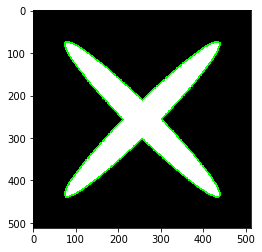

In [5]:
plt.imshow(color)

* 면적구하기

* true일때는 부호가 있는 면적 아닐때는 부호가 없는 면적을 구함

In [6]:
contour = contours[0]

print('Area of contour is %.2f' % cv2.contourArea(contour))
print('Signed area of contour is %.2f' % cv2.contourArea(contour, True))
print('Signed area of contour is %.2f' % cv2.contourArea(contour[::-1], True))

Area of contour is 47474.00
Signed area of contour is -47474.00
Signed area of contour is 47474.00


* 컨투어의 둘레는 arcLength()함수로 구할 수 있다. 두번째 파라미터인 2번째 파라미터의 의미는 폐곡선의 여부로, 설정한 값이 True 일 때는 컨투어의 시작점과 끝점을 이어 도형을 구성하고 그 둘레 값을 계산한다. False인 경우 시작점과 끝점을 잇지 않고 둘레를 계산한다

In [7]:
print('Length of closed contour is %.2f' % cv2.arcLength(contour, True))
print('Length of open contour is %.2f' % cv2.arcLength(contour, False))

Length of closed contour is 1905.29
Length of open contour is 1897.29


* 윤곽선의 볼록외피를 찾아 이미지에 표시

In [8]:
hull = cv2.convexHull(contour)
cv2.drawContours(color, [hull], -1, (0,0,255), 3)

cv2.imshow('contours', color)
cv2.waitKey()
cv2.destroyAllWindows()

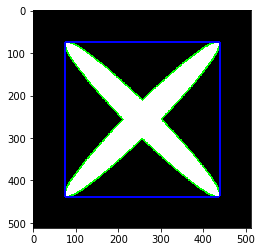

In [9]:
plt.imshow(color)

* 볼록외피 존재 유무 판단

In [10]:
print('Convex status of contour is %s' % cv2.isContourConvex(contour))
print('Convex status of its hull is %s' % cv2.isContourConvex(hull))

Convex status of contour is False
Convex status of its hull is True


* 윤곽선 근사값에 대한 트랙바 생성, 근사된 윤곽선 출력 화면에 표시

* approxPolyDP : 인자로 주어진 곡선 또는 다각형을 입실론 값에 따라 꼭지점수를 줄여 새로운 곡선이나 다각형을 생성하여 리턴한다.

In [12]:
cv2.namedWindow('contours')

img = np.copy(color)

def trackbar_callback(value):
    global img
    epsilon = value*cv2.arcLength(contour, True)*0.1/255
    #Ramer-Douglas-Peucker 알고리즘
    approx = cv2.approxPolyDP(contour, epsilon, True)
    img = np.copy(color)
    cv2.drawContours(img, [approx], -1, (255,0,255), 3)

cv2.createTrackbar('Epsilon', 'contours', 1, 255, lambda v: trackbar_callback(v))
while True:
    cv2.imshow('contours', img)
    key = cv2.waitKey(3)
    if key == 27: 
        break

cv2.destroyAllWindows()